In [1]:
import sklearn
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/mia/Desktop/housing.csv')
df.shape

(506, 14)

In [67]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       452 non-null float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [3]:
correlations = pd.DataFrame(df.corr())
correlations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.288969,0.586719,-0.067536,-0.139448,-0.185045,0.462470,-0.312843,-0.151996,0.754362,-0.140015,-0.053260,0.392225,-0.286245
ZN,-0.288969,1.000000,-0.491587,-0.005843,0.038450,0.078721,-0.488006,0.268317,0.062767,-0.256799,0.049491,0.015810,-0.390092,0.331570
INDUS,0.586719,-0.491587,1.000000,-0.185873,-0.394483,-0.448809,0.700699,-0.605973,-0.427834,0.748951,-0.351166,0.233471,0.465583,-0.411915
CHAS,-0.067536,-0.005843,-0.185873,1.000000,0.585243,0.585447,-0.269616,0.523772,0.587673,-0.347552,0.470870,-0.495956,0.011260,0.154409
NOX,-0.139448,0.038450,-0.394483,0.585243,1.000000,0.975767,-0.550065,0.923503,0.985957,-0.570346,0.775302,-0.856608,0.079688,-0.332778
RM,-0.185045,0.078721,-0.448809,0.585447,0.975767,1.000000,-0.595786,0.946946,0.992620,-0.610962,0.806522,-0.848289,0.029450,0.740181
AGE,0.462470,-0.488006,0.700699,-0.269616,-0.550065,-0.595786,1.000000,-0.744068,-0.585574,0.635697,-0.477048,0.417216,0.414354,-0.299893
DIS,-0.312843,0.268317,-0.605973,0.523772,0.923503,0.946946,-0.744068,1.000000,0.947606,-0.689224,0.766224,-0.778075,-0.080368,0.138798
RAD,-0.151996,0.062767,-0.427834,0.587673,0.985957,0.992620,-0.585574,0.947606,1.000000,-0.586540,0.805556,-0.861694,0.056185,-0.217902
TAX,0.754362,-0.256799,0.748951,-0.347552,-0.570346,-0.610962,0.635697,-0.689224,-0.586540,1.000000,-0.485166,0.372806,0.284030,-0.345898


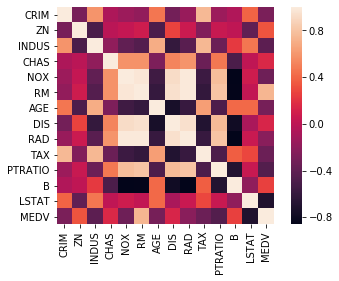

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
hm = sns.heatmap(correlations,
                 linewidths=0,
                 cbar=True,
                 annot=False,
                 square=True,
                 fmt='.1f',
                 annot_kws={'size': 12},
                 yticklabels=df.columns,
                 xticklabels=df.columns)
plt.show()

<Figure size 504x504 with 0 Axes>

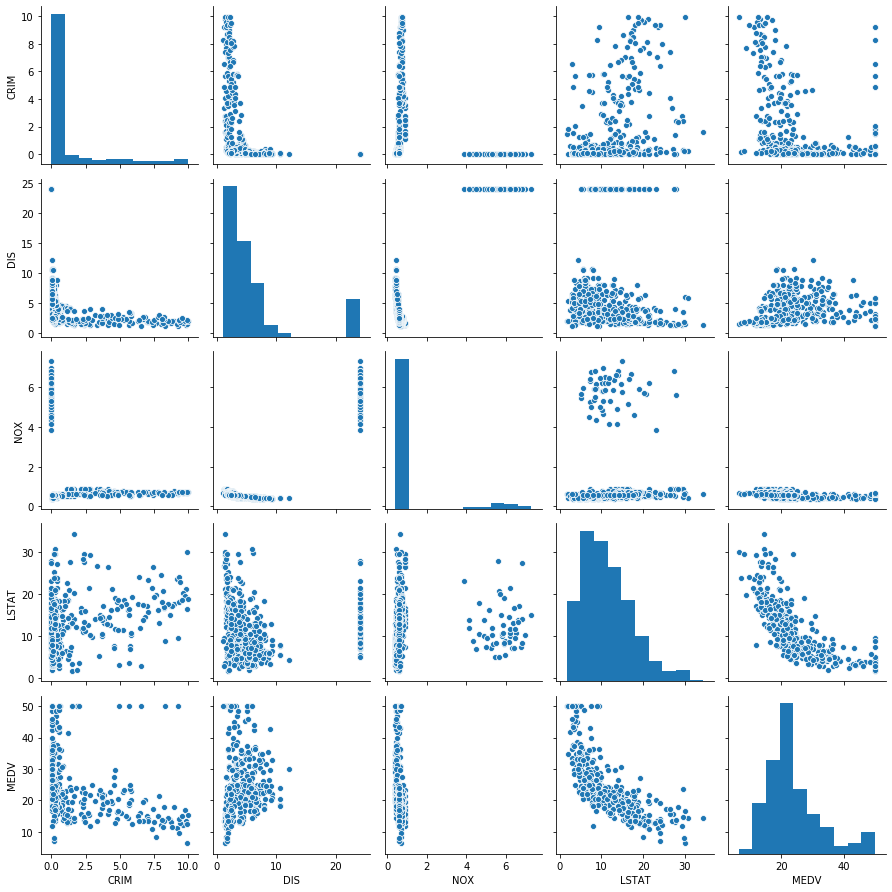

In [7]:
#choose 5 columns to plot
cols=['CRIM', 'DIS', 'NOX', 'LSTAT', 'MEDV']
plt.figure(figsize=(7,7))
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

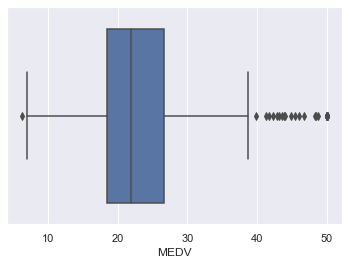

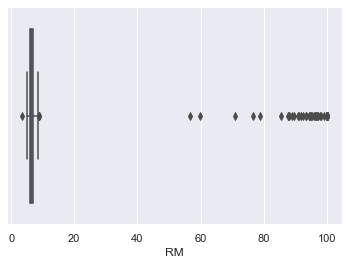

In [66]:
#create box plot 
sns.set()
sns.boxplot(df["MEDV"],data=df)
plt.show()

sns.set()
sns.boxplot(df["RM"],data=df)
plt.show()

In [ ]:
#fit linear regression model

In [19]:
df2 = pd.read_csv('/Users/mia/Desktop/housing2.csv')
#remove missing values
df2.dropna(inplace=True)
df2.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [68]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#all of the features of the data as explanatory variables; test size as 20%
X=df2[df2.columns[:-1]].values
y=df2['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr= LinearRegression()
lr.fit(X_train,y_train)
mean_squared_error(lr.predict(X_train), y_train)

19.076839001549022

In [69]:
mean_squared_error(lr.predict(X_test), y_test)

22.320863963140162

In [70]:
lr.score(X_train, y_train)

0.759485972241301

In [72]:
lr.coef_

array([ 6.36878258e-01, -8.80800117e-02,  2.50145305e-01, -3.47528161e-03,
       -8.45940464e-02, -2.34404053e-01, -3.38209259e-02, -2.23346672e-01,
       -1.33484470e-01, -2.51521110e-01, -3.76748360e-01,  3.34629218e-01,
       -4.72357790e-02, -4.78393874e-01,  7.67080415e-01,  3.43980336e-01,
        4.95866507e-01, -1.42173379e+00,  3.76577552e+00, -6.44302821e-01,
       -2.89568308e+00,  1.90480739e+00, -1.49260936e+00, -1.92347223e+00,
        9.33146703e-01, -2.88167784e+00])

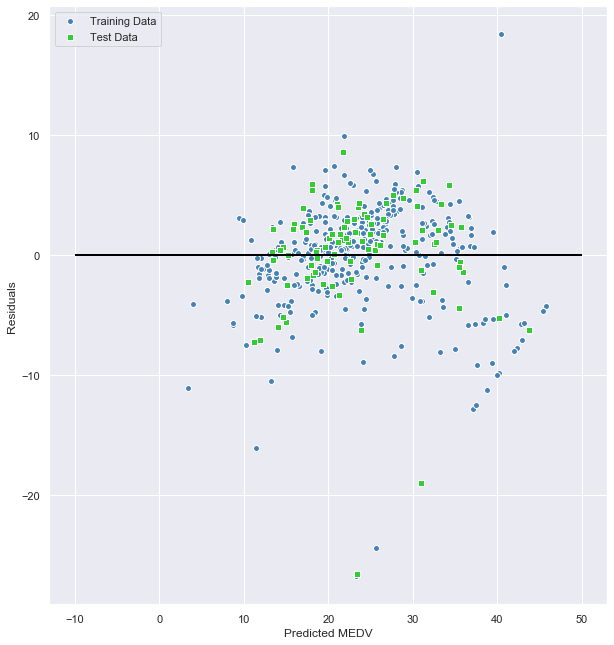

In [43]:
#plot the residuals 
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

residual_train = y_train_pred-y_train
residual_test = y_test_pred-y_test
plt.figure(figsize=(10,11))
plt.scatter(y_train_pred, residual_train, c='steelblue', marker='o', edgecolor='white', label='Training Data')
plt.scatter(y_test_pred, residual_test, c='limegreen', marker='s', edgecolor='white', label='Test Data')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.hlines(y=0,xmin=-10,xmax=50, color='black',lw=2)
plt.legend(loc='upper left')
plt.show()

In [ ]:
#fit Rigid regression model

In [57]:
from sklearn.linear_model import Ridge
min_test_mse = 10000
min_test_mse_1 = []
for a in np.arange(0,100,0.01):
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    min_test_mse_1.append(mean_squared_error(ridge.predict(X_test), y_test))
    if mean_squared_error(ridge.predict(X_test), y_test) < min_test_mse:
        best_a = a
        min_test_mse = mean_squared_error(ridge.predict(X_test), y_test)
        coef = ridge.coef_
        intercept = ridge.intercept_
        R2train = ridge.score(X_train, y_train)
        R2test = ridge.score(X_test, y_test)
        train_mse = mean_squared_error(ridge.predict(X_train), y_train)
print(best_a)
print(min_test_mse)
print(R2train)
print(R2test)
print(train_mse)
print(coef)
print(intercept)

20.14
22.172878411916578
0.75674191880586
0.6804140306623128
19.294488949401853
[ 5.80762098e-01 -1.24376295e-01  2.27353186e-01 -4.67710870e-02
 -9.11949541e-02 -2.08781978e-01  3.05043620e-03 -2.09269483e-01
 -1.20303829e-01 -2.32095834e-01 -3.49295483e-01  3.15312064e-01
 -5.26781258e-02 -2.06655555e-01  5.73276224e-01  2.91161693e-02
  5.38852780e-01 -1.06130421e+00  3.66767711e+00 -5.42290550e-01
 -2.40144999e+00  1.12414955e+00 -9.59657609e-01 -1.80758939e+00
  9.19783796e-01 -2.84924624e+00]
23.911911357340742


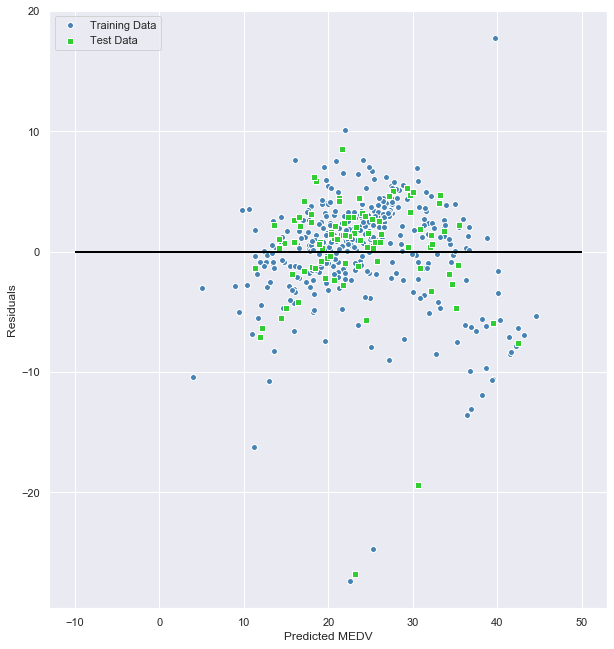

In [58]:
#plot the residuals
ridge_best = Ridge(alpha=22.24)
ridge_best.fit(X_train, y_train)

y_train_pred_ridge = ridge_best.predict(X_train)
y_test_pred_ridge = ridge_best.predict(X_test)

residual_train_ridge = y_train_pred_ridge - y_train
residual_test_ridge = y_test_pred_ridge - y_test
plt.figure(figsize=(10,11))
plt.scatter(y_train_pred_ridge, residual_train_ridge, c='steelblue', marker='o', edgecolor='white', label='Training Data')
plt.scatter(y_test_pred_ridge, residual_test_ridge, c='limegreen', marker='s', edgecolor='white', label='Test Data')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.hlines(y=0,xmin=-10,xmax=50, color='black',lw=2)
plt.legend(loc='upper left')
plt.show()

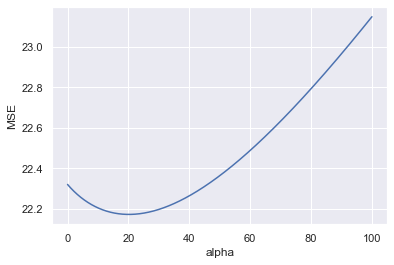

In [60]:
plt.plot(np.arange(0,100,0.01), min_test_mse_1)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [ ]:
#fit Lasso regression model

In [62]:
from sklearn.linear_model import Lasso

min_test_mse = 10000
min_test_mse_2 = []

for a in np.arange(0,100,0.01):
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    min_test_mse_2.append(mean_squared_error(lasso.predict(X_test), y_test))
    if mean_squared_error(lasso.predict(X_test), y_test) < min_test_mse:
        best_a = a
        min_test_mse = mean_squared_error(lasso.predict(X_test), y_test)
        coef = lasso.coef_
        intercept = lasso.intercept_
        R2train = lasso.score(X_train, y_train)
        R2test = lasso.score(X_test, y_test)
        train_mse = mean_squared_error(lasso.predict(X_train), y_train)
        
print(best_a)
print(min_test_mse)
print(R2train)
print(R2test)
print(train_mse)
print(coef)
print(intercept)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3443.3694397795966, tolerance: 2.8633418781163433
  positive)


0.02
22.259925959464297
0.7590791405127029
0.6791593818817305
19.109107653234386
[ 0.61563549 -0.07332917  0.22814233 -0.         -0.07101455 -0.20728528
 -0.         -0.20152123 -0.10311897 -0.22848783 -0.35722077  0.31247513
 -0.04139319 -0.2672567   0.67511661  0.16832147  0.49668051 -1.33192057
  3.76073859 -0.59419986 -2.7841839   1.51334765 -1.23868174 -1.88785359
  0.93013782 -2.91740703]
23.911911357340742


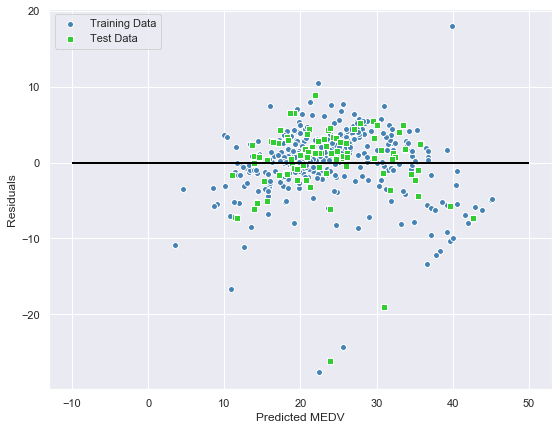

In [63]:
#plot residuals for Lasso regression

lasso_best = Lasso(alpha=0.05)
lasso_best.fit(X_train, y_train)

y_train_pred_lasso = lasso_best.predict(X_train)
y_test_pred_lasso = lasso_best.predict(X_test)

residual_train_lasso = y_train_pred_lasso - y_train
residual_test_lasso = y_test_pred_lasso - y_test
plt.figure(figsize=(9,7))
plt.scatter(y_train_pred_lasso, residual_train_lasso, c='steelblue', marker='o', edgecolor='white', label='Training Data')
plt.scatter(y_test_pred_lasso, residual_test_lasso, c='limegreen', marker='s', edgecolor='white', label='Test Data')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.hlines(y=0,xmin=-10,xmax=50, color='black',lw=2)
plt.legend(loc='upper left')
plt.show()

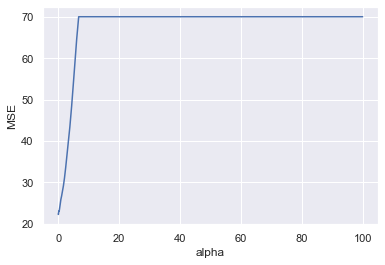

In [64]:
plt.plot(np.arange(0,100,0.01), min_test_mse_2)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [ ]:
print("My name is Wanbin Cao")
print("My NetID is: wcao11")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")